In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
# DataFrame
df = pd.read_csv('okcupid_profiles.csv')
df.head()


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

Data Characteristics/Summary

Cupid has 59,946 rows, 31 columns with a mix of categorical and continuous variables

- Continuous Variables

age, height, income

- Categorical Variables

body_type, diet, drinks, drugs, education, ethnicity, job, offspring, orientation, pets, religion, sex, sign, smokes, speaks, status, last_online, location
The data also has 9 essays that include short blurbs about the user

# See duplicates in data


In [64]:
# print number duplicates in data
duplicates = df.duplicated()
print("__________________________")
print(duplicates.value_counts())

# print decribe data
print("__________________________")
print(df.describe(include='all'))

__________________________
False    59946
dtype: int64
__________________________
                 age  status    sex orientation body_type             diet  \
count   59946.000000   59946  59946       59946     54650            35551   
unique           NaN       5      2           3        12               18   
top              NaN  single      m    straight   average  mostly anything   
freq             NaN   55697  35829       51606     14652            16585   
mean       32.340290     NaN    NaN         NaN       NaN              NaN   
std         9.452779     NaN    NaN         NaN       NaN              NaN   
min        18.000000     NaN    NaN         NaN       NaN              NaN   
25%        26.000000     NaN    NaN         NaN       NaN              NaN   
50%        30.000000     NaN    NaN         NaN       NaN              NaN   
75%        37.000000     NaN    NaN         NaN       NaN              NaN   
max       110.000000     NaN    NaN         NaN       NaN   

# Exploring the Data
One thing I want to see is the percentage of data thats null for each parameter I'm looking at. I want to know how much data I'm dropping, and be able to understand how much of the data is missing per parameter (are people leaving out their drugs information for fear of judgement? or body type for fear of body shaming? etc...)

In [33]:
def percent_null(param):
    total_null_param = df[param].isnull().sum()
    total_param = len(df[param])
    if total_param == 0:
        return 0.0  # Avoid division by zero
    return round((total_null_param / total_param) * 100, 2)

params_to_check = ['drinks', 'drugs', 'smokes', 'pets', 'sign']

for param in params_to_check:
    percent_null_value = percent_null(param)
    print(f"Percentage of null values for {param}: {percent_null_value}%")


Percentage of null values for drinks: 4.98%
Percentage of null values for drugs: 23.49%
Percentage of null values for smokes: 9.19%
Percentage of null values for pets: 33.23%
Percentage of null values for sign: 18.44%


# Continuous Variables:
 age, height, and income

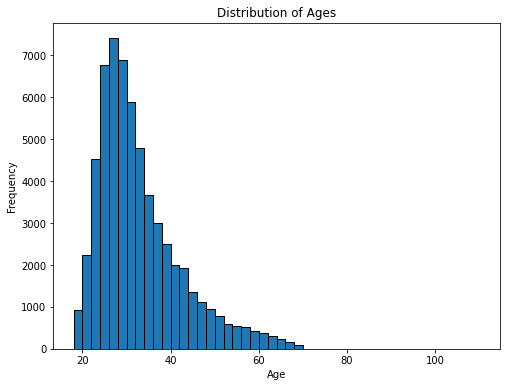

In [42]:
# age
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=range(min(df['age']), max(df['age']) + 2, 2), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()


In [43]:
median_age = np.median(df.age)
mean_age = np.mean(df.age)

print("Median age: {}".format(median_age))
print("Average age: {}".format(mean_age))

Median age: 30.0
Average age: 32.3402895939679


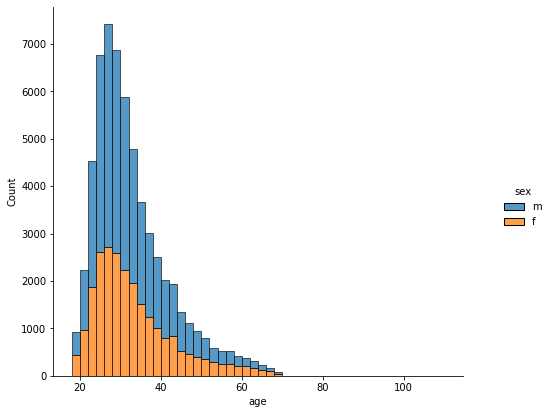

In [46]:
ax = sns.displot(data = df, x = 'age', hue = 'sex', binwidth = 2, multiple = 'stack')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

In [47]:
sex_avg_age = df.groupby("sex").age.mean()
print(sex_avg_age)

#confirmed that have basically the same average age

sex
f    32.818220
m    32.018588
Name: age, dtype: float64


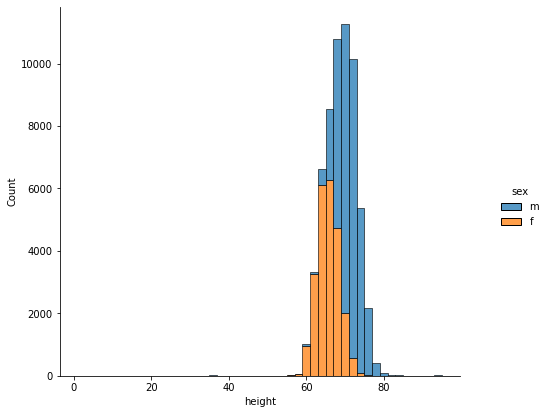

In [51]:
ax = sns.displot(data = df, x = 'height', binwidth = 2, hue = 'sex', multiple = 'stack')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

In [56]:
mean_height = np.mean(df.height)

print("Average height: {}".format(mean_height))

#per sex:
sex_avg_height = df.groupby("sex").height.mean()
#print(sex_avg_height)

print("Average height for females is {} inches while males is {}.".format(
    round(sex_avg_height[0], 2), round(sex_avg_height[1], 2)))

Average height: 68.29528051649066
Average height for females is 65.1 inches while males is 70.44.


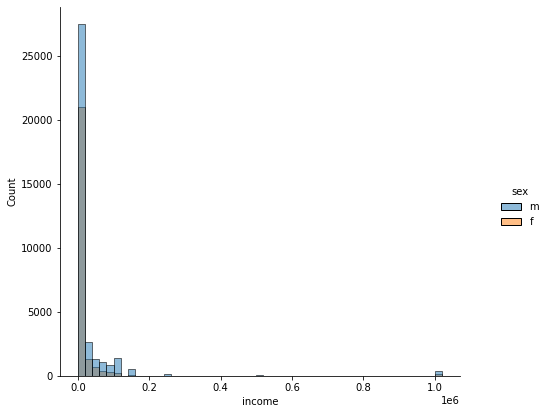

In [57]:
# Income
ax = sns.displot(data = df, x = 'income', binwidth = 20000, hue = 'sex')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

In [58]:
#hard to see but can still see average income per sex:

mean_income = np.mean(df.income)

print("Average income: {}".format(round(mean_income, 2)))

#per sex:
sex_avg_income = df.groupby("sex").income.mean()
#print(sex_avg_height)

print("Average income for females is {} while males incomes is {}.".format(
    round(sex_avg_income[0], 2), round(sex_avg_income[1], 2)))

Average income: 20033.22
Average income for females is 11181.7 while males incomes is 25991.31.


# Discreet/Categorical Variables:


<AxesSubplot:xlabel='sex', ylabel='count'>

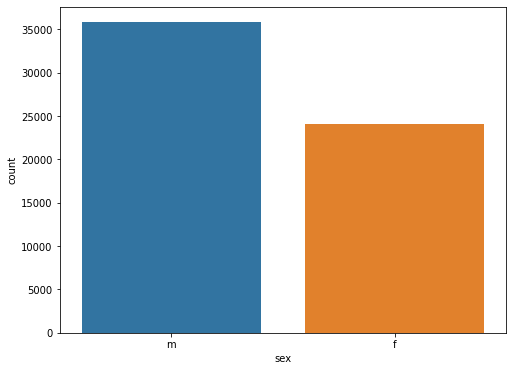

In [59]:
fig = plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'sex')

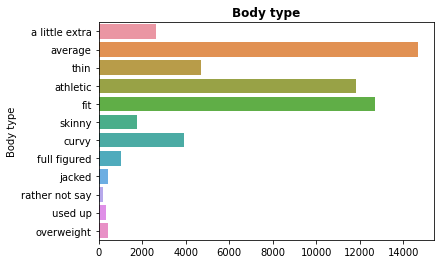

In [65]:
# Body Type:
sns.countplot(y=df['body_type'])
plt.title("Body type", fontweight='bold')
plt.ylabel("Body type")
plt.xlabel("")
plt.show()

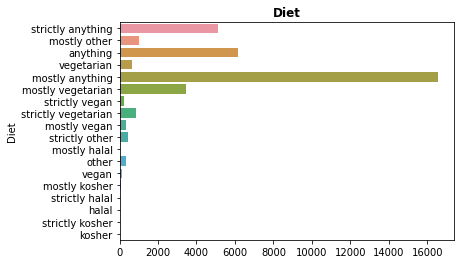

In [66]:
# Diet
sns.countplot(y='diet', data=df)
plt.title("Diet", fontweight='bold')
plt.xlabel("")
plt.ylabel("Diet")
plt.show()

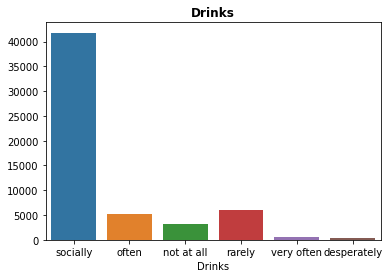

In [67]:
# Drinks
sns.countplot(x='drinks', data=df)
plt.title("Drinks", fontweight='bold')
plt.xlabel("Drinks")
plt.ylabel("")
plt.show()

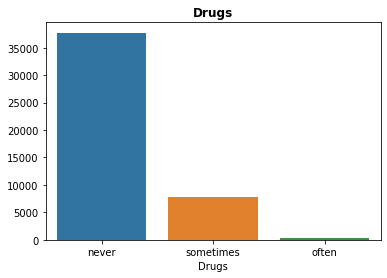

In [68]:
#Drugs
sns.countplot(x='drugs', data=df)
plt.title("Drugs", fontweight='bold')
plt.xlabel("Drugs")
plt.ylabel("")
plt.show()

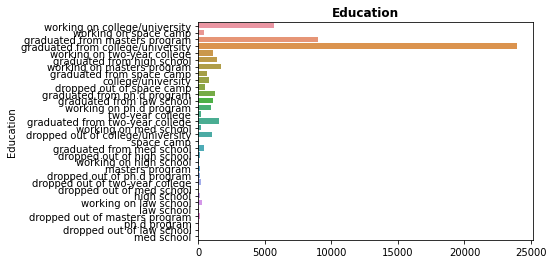

In [69]:
# education
sns.countplot(y='education', data=df)
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show()

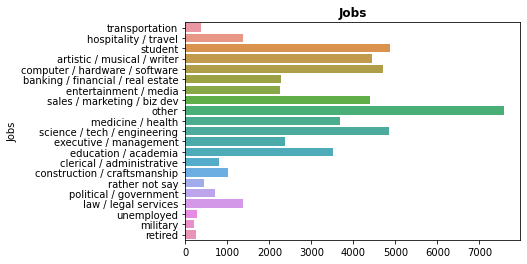

In [70]:
# jobs
sns.countplot(y='job', data=df)
plt.title("Jobs", fontweight='bold')
plt.ylabel("Jobs")
plt.xlabel("")
plt.show()

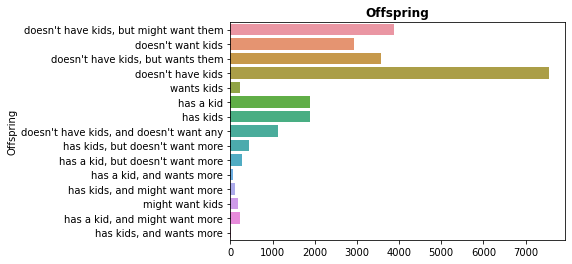

In [71]:
# offspring
sns.countplot(y='offspring', data=df)
plt.title("Offspring", fontweight='bold')
plt.ylabel("Offspring")
plt.xlabel("")
plt.show()

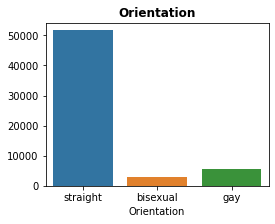

In [72]:
# Orientation
plt.figure(figsize=(4, 3))
sns.countplot(x='orientation', data=df)
plt.title("Orientation", fontweight='bold')
plt.xlabel("Orientation")
plt.ylabel("")
plt.show()

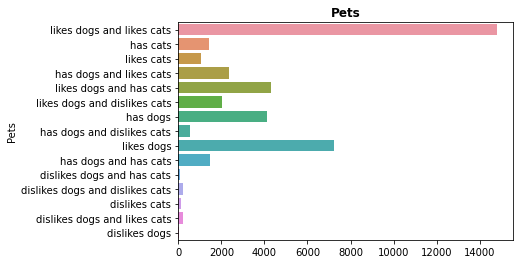

In [73]:
#Pets
sns.countplot(y='pets', data=df)
plt.title("Pets", fontweight='bold')
plt.xlabel("")
plt.ylabel("Pets")
plt.show()

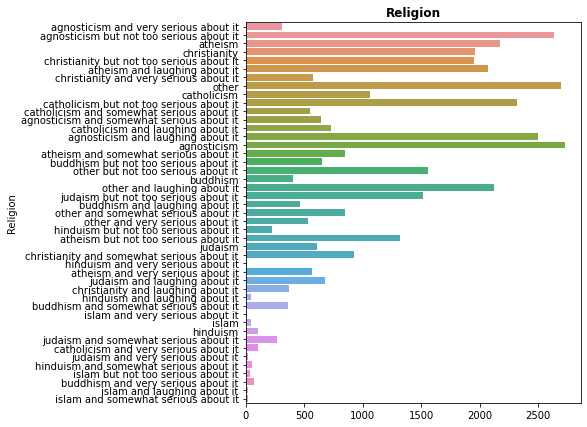

In [74]:
# Religion
plt.figure(figsize=(6,7))
sns.countplot(y='religion', data=df)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
plt.show()

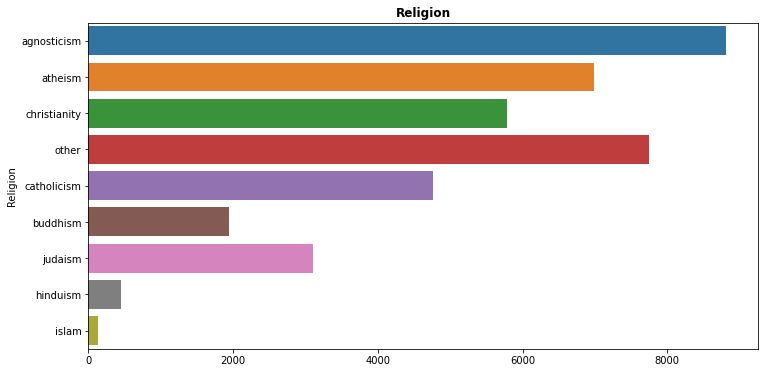

In [76]:
df['religionCleaned'] = df.religion.str.split().str.get(0)

ax = plt.figure(figsize=(12, 6))
sns.countplot(y='religionCleaned', data=df)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
plt.show()

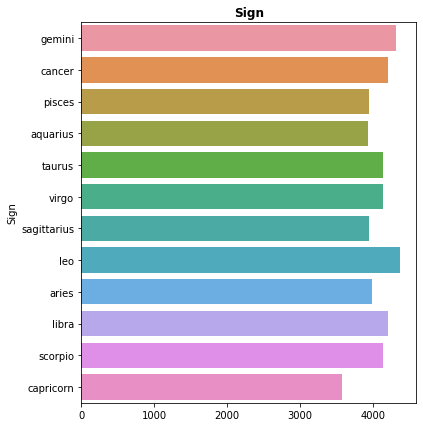

In [77]:
# Sign
df['signsCleaned'] = df.sign.str.split().str.get(0).reset_index(drop=True)
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='signsCleaned', data=df)
plt.title("Sign", fontweight='bold')
plt.xlabel("")
plt.ylabel("Sign")
plt.show()

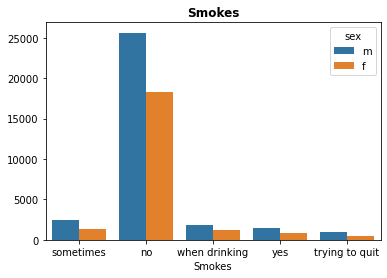

In [78]:
# Smokes
plt.figure(figsize=(6,4))
sns.countplot(x='smokes', data=df, hue='sex')
plt.title("Smokes", fontweight='bold')
plt.ylabel("")
plt.xlabel("Smokes")
plt.show()

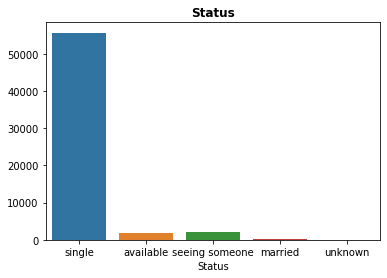

In [79]:
# Status
sns.countplot(x='status', data=df)
plt.title("Status", fontweight='bold')
plt.ylabel("")
plt.xlabel("Status")
plt.show()